# Evaluating ML Models

In [1]:
import os 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

## 4.1 Evaluation Metrics - Session Overview

In [2]:
df = pd.read_csv("../Module 3/dataset/telco_customer_churn.csv")

df.columns = df.columns.str.lower().str.replace(" ", "_")

categorical_columns = list(df.dtypes[df.dtypes == "object"].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ", "_")

df.totalcharges = pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == "yes").astype(int)

In [4]:
df.head().T 

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
print(df.shape)

(7043, 21)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction import DictVectorizer 
from sklearn.linear_model import LogisticRegression 

In [6]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values 
y_val = df_val.churn.values 
y_test = df_test.churn.values 

del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

In [10]:
numerical_features = ["tenure", "monthlycharges", "totalcharges"]

categorical_features = [
    "gender",
    "seniorcitizen",
    "partner",
    "dependents",
    "phoneservice",
    "multiplelines",
    "internetservice",
    "onlinesecurity",
    "onlinebackup",
    "deviceprotection",
    "techsupport",
    "streamingtv",
    "streamingmovies",
    "contract",
    "paperlessbilling",
    "paymentmethod"
]

In [12]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_features + numerical_features].to_dict(orient="records")
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\Dell\AppData\Local\pypoetry\Cache\virtualenvs\machine-learning-zoomcamp-23-gSc8i9dl-py3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
val_dict = df_val[categorical_features + numerical_features].to_dict(orient="records")
X_val = dv.transform(val_dict)

y_val_pred = model.predict_proba(X_val)[:, 1]
val_churn_decision = (y_val_pred >= 0.5)
(y_val == val_churn_decision).mean()

0.8026969481902059

## 4.2 Accuracy and Dummy Model

Is 80% accuracy good enough?

In [22]:
len(y_val)

1409

In [23]:
# Count of correct predictions 
(y_val == val_churn_decision).sum()

1131

In [27]:
thresholds = np.linspace(0, 1, 21)
print(thresholds)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [35]:
best_threshold = -np.inf 
best_accuracy = -np.inf 
scores = []

for t in thresholds:
    val_churn_decision = (y_val_pred >= t).astype(int)
    accuracy = (y_val == val_churn_decision).mean()
    scores.append(accuracy)

    print(f"Threshold = {t}")
    print(f"Accuracy: {accuracy*100:.2f}%")
    print("\n-------\n")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy 
        best_threshold = t 


Threshold = 0.0
Accuracy: 27.40%

-------

Threshold = 0.05
Accuracy: 51.03%

-------

Threshold = 0.1
Accuracy: 59.12%

-------

Threshold = 0.15000000000000002
Accuracy: 66.64%

-------

Threshold = 0.2
Accuracy: 70.97%

-------

Threshold = 0.25
Accuracy: 73.88%

-------

Threshold = 0.30000000000000004
Accuracy: 76.01%

-------

Threshold = 0.35000000000000003
Accuracy: 77.22%

-------

Threshold = 0.4
Accuracy: 78.50%

-------

Threshold = 0.45
Accuracy: 79.35%

-------

Threshold = 0.5
Accuracy: 80.27%

-------

Threshold = 0.55
Accuracy: 80.13%

-------

Threshold = 0.6000000000000001
Accuracy: 79.56%

-------

Threshold = 0.65
Accuracy: 78.64%

-------

Threshold = 0.7000000000000001
Accuracy: 76.58%

-------

Threshold = 0.75
Accuracy: 74.45%

-------

Threshold = 0.8
Accuracy: 73.46%

-------

Threshold = 0.8500000000000001
Accuracy: 72.60%

-------

Threshold = 0.9
Accuracy: 72.60%

-------

Threshold = 0.9500000000000001
Accuracy: 72.60%

-------

Threshold = 1.0
Accuracy: 

In [32]:
print(best_accuracy, best_threshold)

0.8026969481902059 0.5


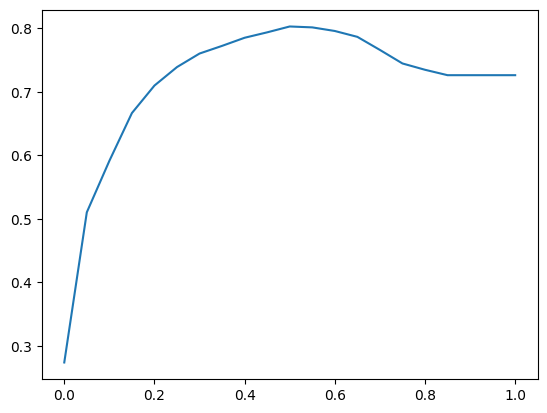

In [34]:
plt.plot(thresholds, scores)

In [38]:
# Using scikit-learn to measure accuracy 
from sklearn.metrics import accuracy_score 

score = accuracy_score(y_val, y_val_pred >= 0.5)
print(score)


0.8026969481902059


In [39]:
from collections import Counter 

In [40]:
Counter(y_val_pred >= 1.0)

Counter({False: 1409})

In [41]:
Counter(y_val)

Counter({0: 1023, 1: 386})

Accuracy is not a good metric when the class distribution is unbalanced.

## 4.3 Confusion Table 
- Different types of errors and correct decisions
- Arranging them in a table

In [42]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [43]:
t = 0.5 
predict_positive = (y_val_pred >= 0.5)
predict_negative = (y_val_pred < 0.5)

In [50]:
# TP 
TP = (predict_positive & actual_positive).sum()
print(f"TP: {TP:.2f}")

# TN
TN = (predict_negative & actual_negative).sum()
print(f"TN: {TN:.2f}")

TP: 210.00
TN: 921.00


In [51]:
# FP 
FP = (predict_positive & actual_negative).sum()
print(f"FP: {FP:.2f}")

# FN
FN = (predict_negative & actual_positive).sum()
print(f"FN: {FN:.2f}")

FP: 102.00
FN: 176.00


In [52]:
confusion_matrix = np.array([
    [TN, FP],
    [FN, TP]
])

confusion_matrix 

array([[921, 102],
       [176, 210]])

In [53]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## 4.4 Precision and Recall

- PRECISION: tells us the fraction of positive predictions that are correct => $\cfrac{\text{TP}}{\text{TP} + \text{FP}}$

- RECALL: tells us the fraction of correctly identified positive samples => $\cfrac{\text{TP}}{\text{TP} + \text{FN}}$

In [54]:
precision = TP / (TP + FP)  
precision 

0.6730769230769231

In [55]:
recall = TP / (TP + FN)
recall 

0.5440414507772021

## 4.5 ROC Curves

- ROC: Receiver Operating Characteristic 
- FPR: False Positive Rate (We want to minimize this)
- TPR: True Positive Rate (We want to maximize this)

In [56]:
TPR = TP / (TP + FN)
TPR 

0.5440414507772021

In [57]:
FPR = FP / (TN + FP)
FPR 

0.09970674486803519

In [58]:
thresholds = np.linspace(0, 1, 101)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predicted_positive = (y_val_pred >= t)
    predicted_negative = (y_val_pred < t)

    TP = (actual_positive & predicted_positive).sum()
    TN = (actual_negative & predicted_negative).sum()
    FP = (actual_negative & predicted_positive).sum()
    FN = (actual_positive & predicted_negative).sum()

    scores.append((t, TP, FP, FN, TN))

    FPR = FP / (FP + TN)
    TPR = TP / (TP + FN)

In [59]:
scores 

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 912, 1, 111),
 (0.02, 384, 829, 2, 194),
 (0.03, 383, 766, 3, 257),
 (0.04, 381, 715, 5, 308),
 (0.05, 379, 683, 7, 340),
 (0.06, 377, 659, 9, 364),
 (0.07, 372, 641, 14, 382),
 (0.08, 371, 612, 15, 411),
 (0.09, 369, 580, 17, 443),
 (0.1, 366, 556, 20, 467),
 (0.11, 365, 528, 21, 495),
 (0.12, 365, 509, 21, 514),
 (0.13, 360, 477, 26, 546),
 (0.14, 354, 453, 32, 570),
 (0.15, 351, 435, 35, 588),
 (0.16, 347, 419, 39, 604),
 (0.17, 346, 401, 40, 622),
 (0.18, 344, 384, 42, 639),
 (0.19, 338, 369, 48, 654),
 (0.2, 333, 356, 53, 667),
 (0.21, 330, 341, 56, 682),
 (0.22, 323, 322, 63, 701),
 (0.23, 320, 313, 66, 710),
 (0.24, 315, 303, 71, 720),
 (0.25, 309, 291, 77, 732),
 (0.26, 304, 281, 82, 742),
 (0.27, 303, 270, 83, 753),
 (0.28, 295, 256, 91, 767),
 (0.29, 291, 244, 95, 779),
 (0.3, 284, 236, 102, 787),
 (0.31, 280, 230, 106, 793),
 (0.32, 278, 226, 108, 797),
 (0.33, 276, 221, 110, 802),
 (0.34, 274, 212, 112, 811),
 (0.35000000000000003, 272,

In [61]:
columns = ["Threshold", "TP", "FP", "FN", "TN"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,Threshold,TP,FP,FN,TN
0,0.00,386,1023,0,0
1,0.01,385,912,1,111
2,0.02,384,829,2,194
3,0.03,383,766,3,257
4,0.04,381,715,5,308


In [63]:
df_scores["TPR"] = df_scores.TP / (df_scores.TP + df_scores.FN) 
df_scores["FPR"] = df_scores.FP / (df_scores.FP + df_scores.TN)

In [64]:
df_scores.head()

,Threshold,TP,FP,FN,TN,TPR,FPR
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,912,1,111,0.997409,0.891496
2,0.02,384,829,2,194,0.994819,0.810362
3,0.03,383,766,3,257,0.992228,0.748778
4,0.04,381,715,5,308,0.987047,0.698925


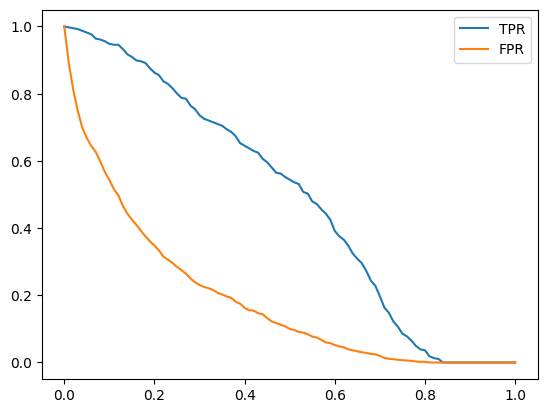

In [66]:
# Plot the TPR and FPR 
plt.plot(df_scores["Threshold"], df_scores["TPR"], label="TPR")
plt.plot(df_scores["Threshold"], df_scores["FPR"], label="FPR")
plt.legend()

### Using a Random model

In [67]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [68]:
((y_rand >= 0.5) == y_val).mean()

0.5017743080198722

In [77]:
def tpr_fpr_dataframe(y_val, y_pred):
    thresholds = np.linspace(0, 1, 101)

    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predicted_positive = (y_pred >= t)
        predicted_negative = (y_pred < t)

        TP = (actual_positive & predicted_positive).sum()
        TN = (actual_negative & predicted_negative).sum()
        FP = (actual_negative & predicted_positive).sum()
        FN = (actual_positive & predicted_negative).sum()

        scores.append((t, TP, FP, FN, TN))

    columns = ["Threshold", "TP", "FP", "FN", "TN"]
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores["TPR"] = df_scores["TP"] / (df_scores["TP"] + df_scores["FN"])
    df_scores["FPR"] = df_scores["FP"] / (df_scores["FP"] + df_scores["TN"])

    return df_scores 

In [78]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand.head()

,Threshold,TP,FP,FN,TN,TPR,FPR
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,382,1013,4,10,0.989637,0.990225
2,0.02,379,993,7,30,0.981865,0.970674
3,0.03,375,979,11,44,0.971503,0.956989
4,0.04,372,969,14,54,0.963731,0.947214


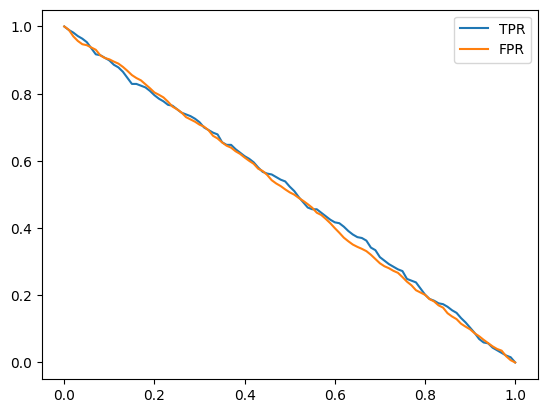

In [79]:
# Plot the TPR and FPR 
plt.plot(df_rand["Threshold"], df_rand["TPR"], label="TPR")
plt.plot(df_rand["Threshold"], df_rand["FPR"], label="FPR")
plt.legend()

### Ideal model

In [80]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

num_neg, num_pos 

(1023, 386)

In [81]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal 

array([0, 0, 0, ..., 1, 1, 1])

In [82]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [83]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

1.0

In [84]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

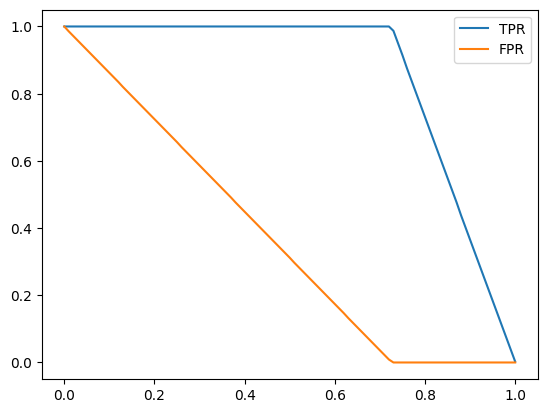

In [85]:
# Plot the TPR and FPR 
plt.plot(df_ideal["Threshold"], df_ideal["TPR"], label="TPR")
plt.plot(df_ideal["Threshold"], df_ideal["FPR"], label="FPR")
plt.legend()

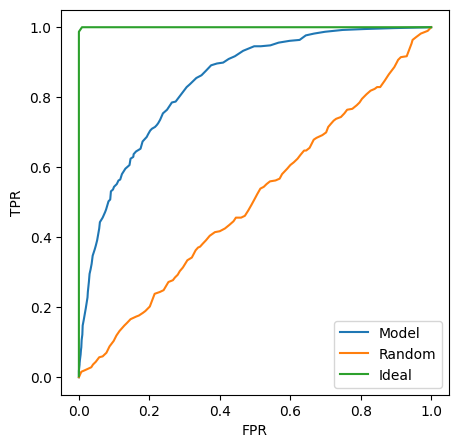

In [87]:
# Plotting TPR over FPR for all the models 
plt.figure(figsize=(5, 5))

plt.plot(df_scores.FPR, df_scores.TPR, label="Model")
plt.plot(df_rand.FPR, df_rand.TPR, label="Random")
plt.plot(df_ideal.FPR, df_ideal.TPR, label="Ideal")

plt.xlabel("FPR")
plt.ylabel("TPR")

plt.legend()

- The ideal point is where the TPR is 100% and the FPR is 0% 

- We want to achieve an elbow curve scenario where a good model is far from the random model baseline and close to the ideal model which is perfect.

## 4.6 ROC-AUC Curve 

- AUC means Area Under the Curve 
- AUC helps us to evaluate the quality of our model.
- For a random baseline model, AUC = 0.5
- For an ideal model, AUC = 1.0

In [92]:
from sklearn.metrics import auc, roc_curve, roc_auc_score 

In [90]:
auc(df_scores.FPR, df_scores.TPR)

0.8438327787316589

In [91]:
auc(df_ideal.FPR, df_ideal.TPR)

0.9999430203759136

In [93]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)
auc(fpr, tpr)

0.8438657002922422

In [94]:
roc_auc_score(y_val, y_val_pred)

0.8438657002922422

- AUC tells us the probability that a randomly selected positive example is greater than a randomly selected negative example.

- AUC is great for evaluating the performance of binary classification models.

In [95]:
neg = y_val_pred[y_val == 0]
pos = y_val_pred[y_val == 1]

In [98]:
pos_idx = np.random.randint(0, len(pos))
neg_idx = np.random.randint(0, len(neg))

In [99]:
pos[pos_idx] > neg[neg_idx]

True

In [102]:
n = 100000
success = 0

for _ in range(n):
    pos_idx = np.random.randint(0, len(pos))
    neg_idx = np.random.randint(0, len(neg))

    if pos[pos_idx] > neg[neg_idx]:
        success += 1 

print(success / n)

0.84273


In [104]:
n = 100000 

pos_idx = np.random.randint(0, len(pos), size=n)
neg_idx = np.random.randint(0, len(pos), size=n)

(pos[pos_idx] > neg[neg_idx]).mean()

0.8498

## 4.7 Cross-Validation 

- Used for evaluating the performance of a model on different subsets of data 

- Cross-validation provides a more robust estimate of a model's performance by averaging the performance on multiple partitions/subsets of the data.

- Cross-validation helps select the optimal model and avoid overfitting.

- Cross-validation can also be used for hyperparameter tuning. This involves selecting the optimal set of parameters that yields the best-performing model.

- Common techniques for cross-validation include k-fold cross-validation, stratified k-fold cross-validation.

In [140]:
def train_model(df, y, C=1.0):
    dicts = df[categorical_features + numerical_features].to_dict(orient="records")

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y)

    return dv, model 

In [141]:
dv, model = train_model(df_train, y_train)

In [142]:
def predict(df, dv, model):
    dicts = df[categorical_features + numerical_features].to_dict(orient="records")

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred 
     

In [143]:
y_pred = predict(df_val, dv, model)

Using K-Fold cross validation

In [144]:
from sklearn.model_selection import KFold 

In [145]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [146]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [147]:
len(train_idx), len(val_idx)

(5070, 564)

In [148]:
len(df_full_train)

5634

In [149]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [150]:
%pip install -q tqdm 

Note: you may need to restart the kernel to use updated packages.


In [151]:
from tqdm.auto import tqdm  

In [152]:
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.churn.values 
    y_val = df_val.churn.values 

    dv, model = train_model(df_train, y_train)
    y_val_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_val_pred)
    scores.append(auc)

10it [00:05,  1.69it/s]


In [153]:
print(scores)

[0.8479398247539081, 0.8411974009900991, 0.8594754414231849, 0.833519874907415, 0.8250000000000001, 0.8342657342657342, 0.8413708889612503, 0.8186669829222013, 0.8452052764191493, 0.861819770764008]


In [154]:
mean = np.mean(scores)
std = np.std(scores)

In [155]:
print(f"Cross validation performance: {mean:.2f} (std={std:.2f})")

Cross validation performance: 0.84 (std=0.01)


Controlling the `C` parameter

In [160]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values 
        y_val = df_val.churn.values 

        dv, model = train_model(df_train, y_train, C=C)
        y_val_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_val_pred)
        scores.append(auc)

    print(f"C = {C} | Mean: {np.mean(scores):.3f} +- {np.std(scores):.3f}")
 

 14%|█▍        | 1/7 [00:04<00:24,  4.11s/it]

C = 0.001 | Mean: 0.82 +- 0.01


 29%|██▊       | 2/7 [00:07<00:18,  3.60s/it]

C = 0.01 | Mean: 0.84 +- 0.01


 43%|████▎     | 3/7 [00:10<00:14,  3.58s/it]

C = 0.1 | Mean: 0.84 +- 0.01


 57%|█████▋    | 4/7 [00:17<00:14,  4.77s/it]

C = 0.5 | Mean: 0.84 +- 0.01


 71%|███████▏  | 5/7 [00:21<00:09,  4.66s/it]

C = 1 | Mean: 0.84 +- 0.01


 86%|████████▌ | 6/7 [00:25<00:04,  4.29s/it]

C = 5 | Mean: 0.84 +- 0.01


100%|██████████| 7/7 [00:29<00:00,  4.21s/it]

C = 10 | Mean: 0.84 +- 0.01


In [162]:
dv, model = train_model(df_full_train, df_full_train.churn.values, C=1.0)
y_test_pred = predict(df_test, dv, model)

In [163]:
auc = roc_auc_score(y_test, y_test_pred)
auc 

0.8572386167896259